# Task 4.10

## Table of Content
1) Import Libraries and Files
2) Securtiy Implications (done in speretate Workbook)
3) Regional customer behaviour
    - created different regions
    - grouped by high and low spender per region
4) Removed Customers with low order volumen (done in sperate Workbook)
5) Created Customer Profiles
    - Customers by Age Group
    - Customers by Income
    - Customers that are Parents
    - Customers that order on the Weekend /Weekday
6) Visualization
    - Customers by Age Group
    - Customers by Income
    - Customers that are Parents
    - Customers that order on the Weekend /Weekday
7) Descriptive Analysis on Customer profiles - Avg, min, may prices for
    - Customers by Age Group
    - Customers by Income
    - Customers that are Parents
    - Customers that order on the Weekend /Weekday
8) Comparison Customer Profiles and Regions - crosstab and visualization for 
    - Customers by Age Group
    - Customers by Income
    - Customers that are Parents
    - Customers that order on the Weekend /Weekday
9) Comparison Customer Profiles and Departments- crosstab and visualization for 
    - Customers by Age Group
    - Customers by Income
    - Customers that are Parents
    - Customers that order on the Weekend /Weekday

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\RebekkaBrandt\Documents\Instacart Basket Analysis'

In [3]:
# Import orders_products_all
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all_high_activity.pkl'))

PII - Dropped First & Last name in seperate Workbook due to Memory Issue

## Regional customer behaviour 

In [4]:
# Creating regional lists
# Region 1 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

# Region 2
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

# Region 3 
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Arkansas', 'Louisiana']

# Region 4
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'] 


In [5]:
ords_prods_all.loc[ords_prods_all['state'].isin(Northeast), 'region'] = 'Northeast' 

In [6]:
ords_prods_all.loc[ords_prods_all['state'].isin(Midwest), 'region'] = 'Midwest' 

In [7]:
ords_prods_all.loc[ords_prods_all['state'].isin(South), 'region'] = 'South' 

In [8]:
ords_prods_all.loc[ords_prods_all['state'].isin(West), 'region'] = 'West' 

In [9]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,activity,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South


In [10]:
ords_prods_all.groupby('region')['spending_flag'].value_counts()

region     spending_flag
Midwest    Low Spender       7112835
           High Spender       148678
Northeast  Low Spender       5361565
           High Spender       103120
South      Low Spender      10111800
           High Spender       199339
West       Low Spender       7774939
           High Spender       152288
Name: spending_flag, dtype: int64

Removed customer with low order number in seperate Workbook due to Memory Issues

## Customer Profiling

In [11]:
# Flag Age: Young Adults (<=25), Middle-Aged(26-59), Senior (60+)
ords_prods_all.loc[ords_prods_all['age'] < 25, 'age_range'] = 'Young Adult'


In [12]:
ords_prods_all.loc[(ords_prods_all['age'] >= 25) & (ords_prods_all['age'] < 59), 'age_range'] = 'Middle-Aged' 

In [13]:
ords_prods_all.loc[ords_prods_all['age'] >= 60, 'age_range'] = 'Senior'

In [14]:
ords_prods_all['age_range'].value_counts(dropna = False)

Middle-Aged    16494151
Senior         10574504
Young Adult     3415194
NaN              480715
Name: age_range, dtype: int64

In [15]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,family_status,income,activity,region,age_range
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged


In [16]:
# Income Flag: Low Income (<40.000) Mid Income (40.000-100000) High Income (100.000+)

In [17]:
ords_prods_all.loc[ords_prods_all['income'] < 40000, 'income_range'] = 'Low Income'

In [18]:
ords_prods_all.loc[(ords_prods_all['income'] >= 40000) & (ords_prods_all['income'] < 100000), 'income_range'] = 'Mid Income'

In [19]:
ords_prods_all.loc[ords_prods_all['income'] >= 100000, 'income_range'] = 'High Income'

In [20]:
ords_prods_all['income_range'].value_counts(dropna = False)

Mid Income     15145137
High Income    14207402
Low Income      1612025
Name: income_range, dtype: int64

In [21]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_of_dependants,family_status,income,activity,region,age_range,income_range
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged,Mid Income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged,Mid Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged,Mid Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged,Mid Income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,high activity,South,Middle-Aged,Mid Income


In [22]:
# Parent Flag: No (no depentants), yes(1+ dependant)
ords_prods_all.loc[ords_prods_all['number_of_dependants'] == 0, 'parents'] = 'no'

In [23]:
ords_prods_all.loc[ords_prods_all['number_of_dependants'].isin([1, 2, 3]), 'parents'] = 'yes'

In [24]:
ords_prods_all['parents'].value_counts(dropna = False)



yes    23224883
no      7739681
Name: parents, dtype: int64

In [25]:
# DOW Flags:  Weekday Shopper (Mon-Fr), Weekend Shopper (Sat & Sun)
ords_prods_all.loc[ords_prods_all['orders_day_of_week'].isin([2, 3, 4,5,6]), 'DOW'] = 'Weekday Shopper'

In [26]:
ords_prods_all.loc[ords_prods_all['orders_day_of_week'].isin([0,1]), 'DOW'] = 'Weekend Shopper'

In [27]:
ords_prods_all['DOW'].value_counts(dropna = False)

Weekday Shopper    19644268
Weekend Shopper    11320296
Name: DOW, dtype: int64

## Visualization

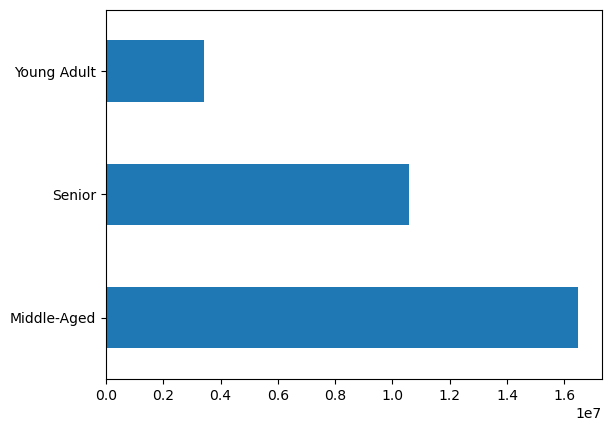

In [28]:
# Customer Age
age = ords_prods_all['age_range'].value_counts().plot(kind = 'barh')

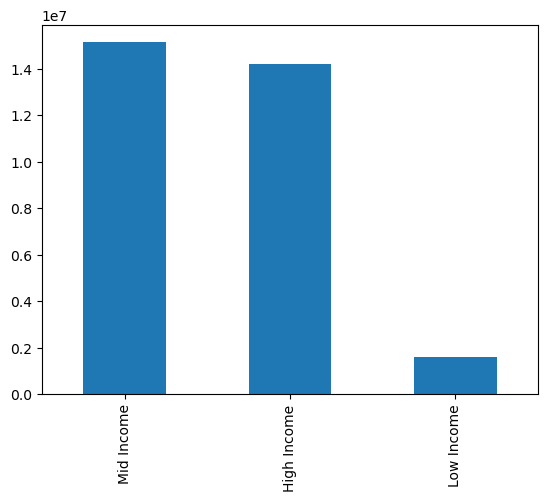

In [29]:
# Customer Income 
income_bar = ords_prods_all['income_range'].value_counts().plot.bar()

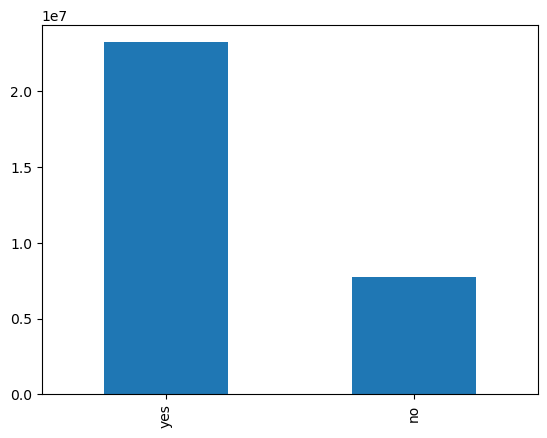

In [30]:
# Parents
Parents = ords_prods_all['parents'].value_counts().plot.bar()

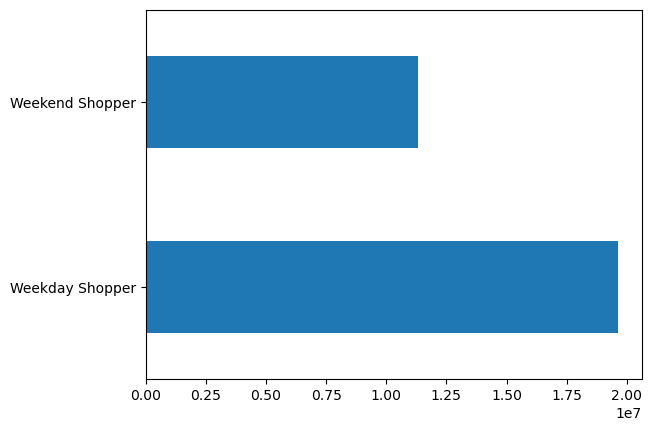

In [31]:
# Day of Week
DOW_bar = ords_prods_all['DOW'].value_counts().plot(kind = 'barh')

In [69]:
# Export Charts
age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))
Parents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parents.png'))
DOW_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Weekend_day_shoppers.png'))

## Descriptive Analysis on Customer profiles

In [32]:
# Age Range
ords_prods_all.groupby('age_range').agg({'prices': ['mean', 'max', 'min'], 'days_since_previous_order': ['mean', 'max', 'min']})

prices            days_since_previous_order           
                 mean   max  min                      mean   max  min
age_range                                                            
Middle-Aged  7.787221  25.0  1.0                 10.824460  30.0  0.0
Senior       7.795316  25.0  1.0                 10.800664  30.0  0.0
Young Adult  7.790551  25.0  1.0                 10.762998  30.0  0.0

In [33]:
# Income Range
ords_prods_all.groupby('income_range').agg({'prices': ['mean', 'max', 'min'], 'days_since_previous_order': ['mean', 'max', 'min']})

prices            days_since_previous_order           
                  mean   max  min                      mean   max  min
income_range                                                          
High Income   7.953304  25.0  1.0                 10.769624  30.0  0.0
Low Income    6.502786  25.0  1.0                 11.273674  30.0  0.0
Mid Income    7.774806  25.0  1.0                 10.799392  30.0  0.0

In [34]:
# Parents
ords_prods_all.groupby('parents').agg({'prices': ['mean', 'max', 'min'], 'days_since_previous_order': ['mean', 'max', 'min']})

prices            days_since_previous_order           
             mean   max  min                      mean   max  min
parents                                                          
no       7.789421  25.0  1.0                 10.791950  30.0  0.0
yes      7.790807  25.0  1.0                 10.816416  30.0  0.0

In [35]:
# Weekend/days Shoppers
ords_prods_all.groupby('DOW').agg({'prices': ['mean', 'max', 'min'], 'days_since_previous_order': ['mean', 'max', 'min']})

prices            days_since_previous_order           
                     mean   max  min                      mean   max  min
DOW                                                                      
Weekday Shopper  7.779228  25.0  1.0                 10.605943  30.0  0.0
Weekend Shopper  7.809953  25.0  1.0                 11.165920  30.0  0.0

## Comparison Customer Profiles and Regions

In [38]:
# Age Group
crosstab_region_age = pd.crosstab(ords_prods_all['region'], ords_prods_all['age_range'], dropna = False)

In [39]:
crosstab_region_age


age_range,Middle-Aged,Senior,Young Adult
region,,,
Midwest,3901774,2455443,791626
Northeast,2885465,1884229,602790
South,5473014,3521421,1165136
West,4233898,2713411,855642


<Axes: title={'center': 'Customer Age in each Region'}, xlabel='Region', ylabel='Number of Customers '>

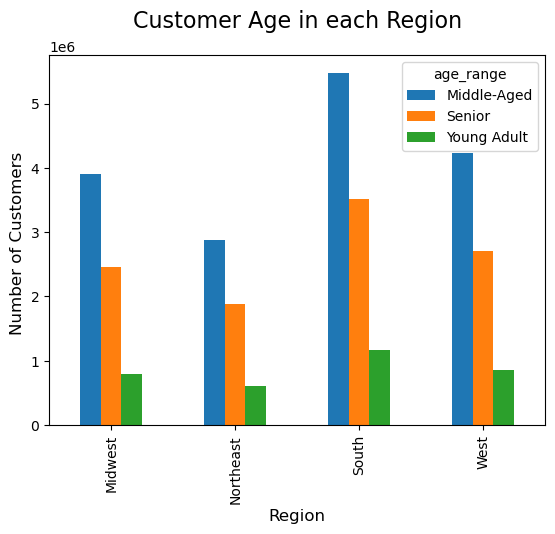

In [43]:
bar_crosstab_region_age = crosstab_region_age.plot(kind = 'bar')
plt.title('Customer Age in each Region', fontsize = 16, pad=20)
plt.ylabel('Number of Customers ', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_crosstab_region_age

In [44]:
# Income Group
crosstab_region_income = pd.crosstab(ords_prods_all['region'], ords_prods_all['income_range'], dropna = False)
crosstab_region_income

income_range,High Income,Low Income,Mid Income
region,,,
Midwest,3400093,373583,3487837
Northeast,2516484,283124,2665077
South,4663945,552104,5095090
West,3626880,403214,3897133


<Axes: title={'center': 'Income Range in each Region'}, xlabel='Region', ylabel='Income per Customers '>

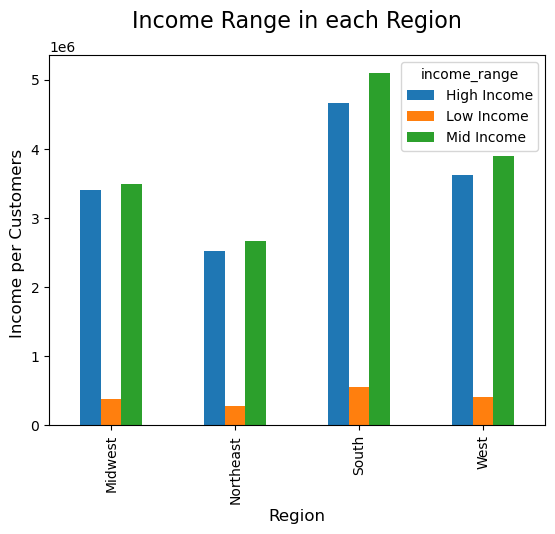

In [46]:
bar_crosstab_region_income = crosstab_region_income.plot(kind = 'bar')
plt.title('Income Range in each Region', fontsize = 16, pad=20)
plt.ylabel('Income per Customers ', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_crosstab_region_income

In [47]:
# Parents
crosstab_region_parents = pd.crosstab(ords_prods_all['region'], ords_prods_all['parents'], dropna = False)
crosstab_region_parents

parents,no,yes
region,,
Midwest,1822816,5438697
Northeast,1354482,4110203
South,2581933,7729206
West,1980450,5946777


<Axes: title={'center': 'Parents in each Region'}, xlabel='Region', ylabel='Parents per Customers '>

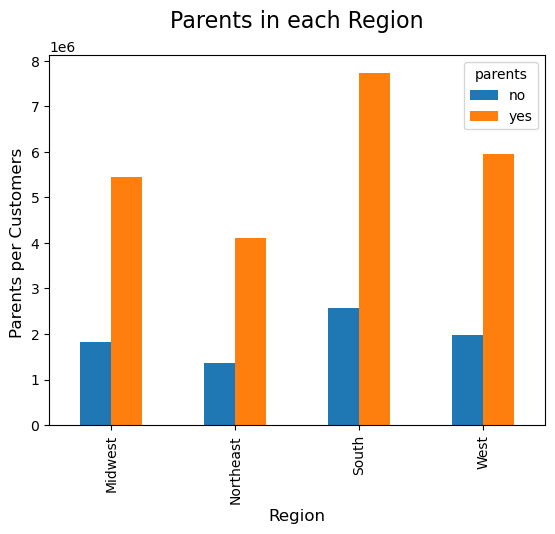

In [48]:
bar_crosstab_region_parents = crosstab_region_parents.plot(kind = 'bar')
plt.title('Parents in each Region', fontsize = 16, pad=20)
plt.ylabel('Parents per Customers ', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_crosstab_region_parents

In [50]:
# Weekend/day Shoppers
crosstab_region_DOW = pd.crosstab(ords_prods_all['region'], ords_prods_all['DOW'], dropna = False)
crosstab_region_DOW

DOW,Weekday Shopper,Weekend Shopper
region,,
Midwest,4607669,2653844
Northeast,3466655,1998030
South,6547439,3763700
West,5022505,2904722


<Axes: title={'center': 'Weekend and Weekday Shoppers in each Region'}, xlabel='Region', ylabel='Weekend and Weekday Shoppers '>

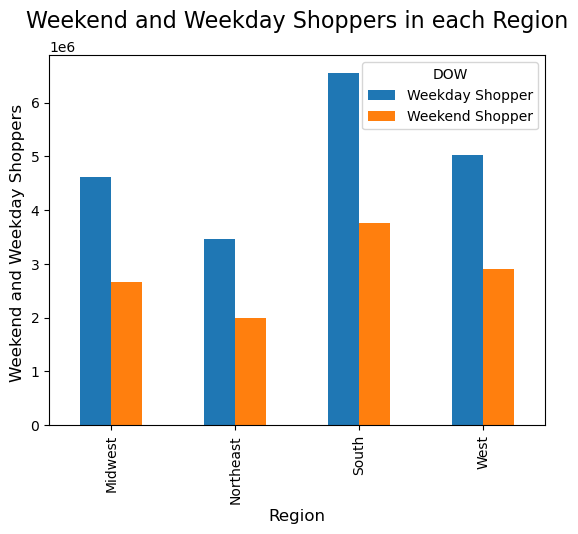

In [52]:
bar_crosstab_region_DOW = crosstab_region_DOW.plot(kind = 'bar')
plt.title('Weekend and Weekday Shoppers in each Region', fontsize = 16, pad=20)
plt.ylabel('Weekend and Weekday Shoppers ', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_crosstab_region_DOW

In [70]:
#Export Charts

bar_crosstab_region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_age.png'))
bar_crosstab_region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income.png'))
bar_crosstab_region_parents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_parent.png'))
bar_crosstab_region_DOW.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_dow.png'))

## Comparison Customer Profiles and Departments

In [56]:
# Age Group
crosstab_dep_age = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['age_range'], dropna = False)
crosstab_dep_age

age_range,Middle-Aged,Senior,Young Adult
department_id,,,
1,1126203,728963,234088
2,18364,11604,3923
3,597783,382446,123582
4,4836248,3104118,999328
5,76945,47596,17477
6,136757,86448,28610
7,1367288,883669,279256
8,48547,31755,11304
9,437352,280102,91735


<Axes: title={'center': 'Age Group by Department'}, xlabel='Department', ylabel='Customer Age Group '>

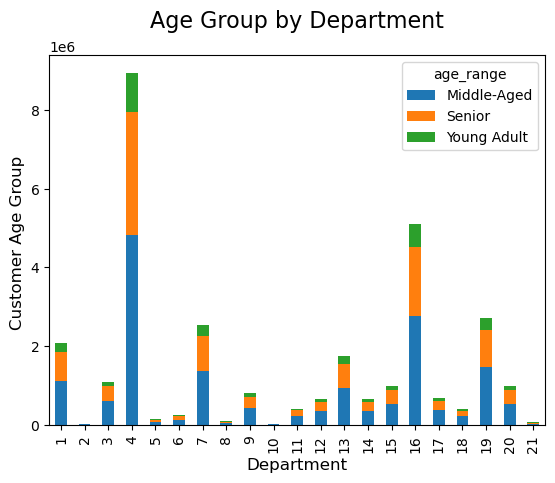

In [59]:
bar_crosstab_dep_age = crosstab_dep_age.plot(kind = 'bar', stacked= True)
plt.title('Age Group by Department', fontsize = 16, pad=20)
plt.ylabel('Customer Age Group ', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)

bar_crosstab_dep_age

In [ ]:
# Age Group
crosstab_dep_age = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['age_range'], dropna = False)
crosstab_dep_age

In [ ]:
bar_crosstab_dep_age = crosstab_dep_age.plot(kind = 'bar', stacked= True)
plt.title('Age Group by Department', fontsize = 16, pad=20)
plt.ylabel('Customer Age Group ', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)

bar_crosstab_dep_age

In [60]:
# Income Group
crosstab_dep_income = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['income_range'], dropna = False)
crosstab_dep_income

income_range,High Income,Low Income,Mid Income
department_id,,,
1,988500,102375,1030856
2,15750,1990,16671
3,527711,49409,543708
4,4237002,380567,4461704
5,69142,8718,66767
6,119991,9997,126003
7,1126462,191662,1253777
8,45089,4421,43550
9,392731,29283,400122


<Axes: title={'center': 'Age Group by Department'}, xlabel='Department', ylabel='Customer Age Group '>

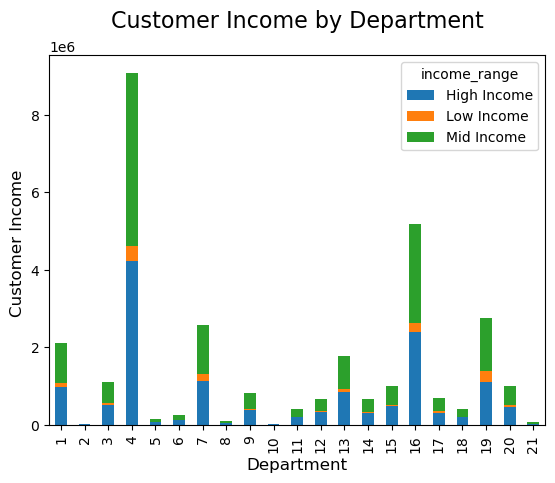

In [62]:
bar_crosstab_dep_income = crosstab_dep_income.plot(kind = 'bar', stacked= True)
plt.title('Customer Income by Department', fontsize = 16, pad=20)
plt.ylabel('Customer Income ', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)

bar_crosstab_dep_age

In [63]:
# Parent
crosstab_dep_parent = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['parents'], dropna = False)
crosstab_dep_parent

parents,no,yes
department_id,,
1,529348,1592383
2,8714,25697
3,281395,839433
4,2275441,6803832
5,36827,107800
6,64461,191530
7,645341,1926560
8,23602,69458
9,204296,617840


<Axes: title={'center': 'Parent by Department'}, xlabel='Department', ylabel='Parent '>

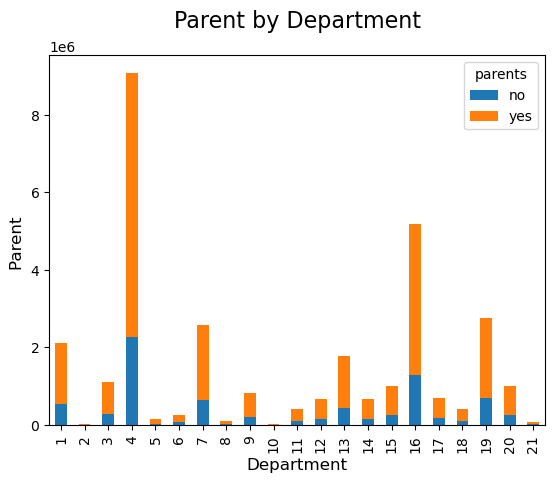

In [64]:
bar_crosstab_dep_parent = crosstab_dep_parent.plot(kind = 'bar', stacked= True)
plt.title('Parent by Department', fontsize = 16, pad=20)
plt.ylabel('Parent ', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)

bar_crosstab_dep_parent

In [65]:
# Weekend /Day Shopper
crosstab_dep_DOW = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['DOW'], dropna = False)
crosstab_dep_DOW

DOW,Weekday Shopper,Weekend Shopper
department_id,,
1,1363816,757915
2,22985,11426
3,711743,409085
4,5601683,3477590
5,109051,35576
6,158926,97065
7,1696857,875044
8,62952,30108
9,509426,312710


<Axes: title={'center': 'Weekend /Day Shopper by Department'}, xlabel='Department', ylabel='Weekend /Day Shopper '>

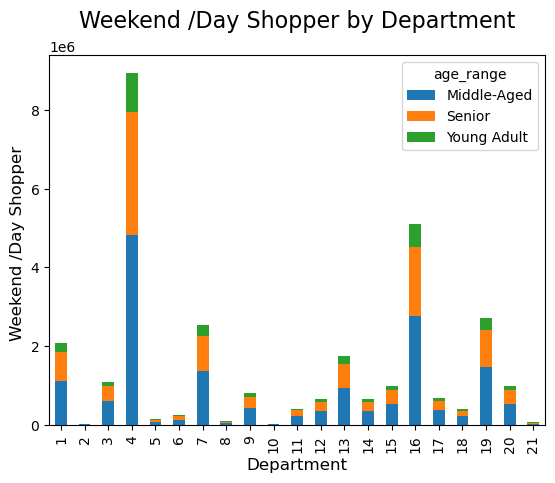

In [66]:
bar_crosstab_dep_DOW = crosstab_dep_age.plot(kind = 'bar', stacked= True)
plt.title('Weekend /Day Shopper by Department', fontsize = 16, pad=20)
plt.ylabel('Weekend /Day Shopper ', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)

bar_crosstab_dep_DOW

In [72]:
#Export Charts

bar_crosstab_dep_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_age.png'))
bar_crosstab_dep_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_income.png'))
bar_crosstab_dep_parent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_rdep_parent.png'))
bar_crosstab_dep_DOW.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_dow.png'))